#### **Importimi i librarive*

In [ ]:
#pip install missingno

In [25]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import missingno as msno

#### Ngarkimi i datasetit

In [2]:
# Ngarkimi i datasetit nga csv file per analize.
dataset_kryesor = pd.read_csv('data/DatasetKryesor.csv', encoding='latin1')

#### Numrimi i rreshtave dhe atributeve ne dataset

In [3]:
# Dimensionet e dataset
dataset_kryesor.shape

(54161, 13)

#### Paraqitja e atributeve te dataset

In [4]:
# atributet e dataset
dataset_kryesor.columns

Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'Sasia', 'Cmimi',
       'Vlera', 'OperatoriEkonomik', 'LlojiHyrjes'],
      dtype='object')

#### Rreshtat e pare te dataset

In [5]:
# Paraqitja e pese rreshtave te pare te dataset
dataset_kryesor.head()

,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,125/2024,Dalje,2024-01-23 00:00:00.000,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
1,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,297/2024,Dalje,2024-02-16 00:00:00.000,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
2,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,231/2024,Dalje,2024-02-06 00:00:00.000,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
3,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,538/2024,Dalje,2024-03-27 00:00:00.000,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
4,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,779/2024,Dalje,2024-05-02 00:00:00.000,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,10.0,0.09,0.90,OE 28,Grant qeveritar


### Tipet e te dhenave per atribute

In [6]:
# Tipet e te dhenave
dataset_kryesor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54161 entries, 0 to 54160
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spitali            54161 non-null  object 
 1   NjesiaReparti      54161 non-null  object 
 2   Numri              54161 non-null  object 
 3   Shenim             54161 non-null  object 
 4   DataRegjistrimit   54161 non-null  object 
 5   Artikulli          54160 non-null  object 
 6   ArtikulliLloji     54161 non-null  object 
 7   RrugaMarrjes       54161 non-null  object 
 8   Sasia              54128 non-null  float64
 9   Cmimi              54128 non-null  float64
 10  Vlera              54131 non-null  float64
 11  OperatoriEkonomik  54161 non-null  object 
 12  LlojiHyrjes        54161 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.4+ MB


#### Vlerat NULL

In [7]:
# Checking for missing data in all columns
missing_data = dataset_kryesor.isnull().sum()

print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Spitali               0
NjesiaReparti         0
Numri                 0
Shenim                0
DataRegjistrimit      0
Artikulli             1
ArtikulliLloji        0
RrugaMarrjes          0
Sasia                33
Cmimi                33
Vlera                30
OperatoriEkonomik     0
LlojiHyrjes           0
dtype: int64


### Kontrollimi i vlerave unike për secilin atribut (shumë e dobishme për variabla kategorike)

In [8]:
for col in dataset_kryesor.columns:
    unique_values = dataset_kryesor[col].nunique()
    print(f'Atributi "{col}" ka {unique_values} vlera unike.')

Atributi "Spitali" ka 8 vlera unike.
Atributi "NjesiaReparti" ka 36 vlera unike.
Atributi "Numri" ka 5622 vlera unike.
Atributi "Shenim" ka 169 vlera unike.
Atributi "DataRegjistrimit" ka 274 vlera unike.
Atributi "Artikulli" ka 1063 vlera unike.
Atributi "ArtikulliLloji" ka 3 vlera unike.
Atributi "RrugaMarrjes" ka 22 vlera unike.
Atributi "Sasia" ka 1138 vlera unike.
Atributi "Cmimi" ka 883 vlera unike.
Atributi "Vlera" ka 5338 vlera unike.
Atributi "OperatoriEkonomik" ka 67 vlera unike.
Atributi "LlojiHyrjes" ka 5 vlera unike.


### Shikimi i statistikave për kolonat numerike (me .describe())

In [12]:
print("Statistikat për kolonat kategorike:")
print(dataset_kryesor.describe(include=['O']))  # 'O' qëndron për 'Object' (teksti)

Statistikat për kolonat kategorike:
          Spitali        NjesiaReparti      Numri Shenim  \
count       54161                54161      54161  54161   
unique          8                   36       5622    169   
top     Spitali 1  Njesia e Kirurgjisë  1512/2024  Dalje   
freq        14888                 7304         78  52251   

               DataRegjistrimit  \
count                     54161   
unique                      274   
top     2024-12-26 00:00:00.000   
freq                        392   

                                                Artikulli ArtikulliLloji  \
count                                               54160          54161   
unique                                               1063              3   
top     B05XA03 - Natrium chloride  0.9%/100ml - Solut...          Barna   
freq                                                 1806          50085   

       RrugaMarrjes OperatoriEkonomik      LlojiHyrjes  
count         54161             54161            

### Identifikimi i kolonave kategorike dhe numerike (automatikisht)

In [13]:
kategorike = dataset_kryesor.select_dtypes(include=['object']).columns
numerike = dataset_kryesor.select_dtypes(include=['int64', 'float64']).columns

print("Kolonat kategorike:", kategorike)
print("Kolonat numerike:", numerike)

Kolonat kategorike: Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'OperatoriEkonomik',
       'LlojiHyrjes'],
      dtype='object')
Kolonat numerike: Index(['Sasia', 'Cmimi', 'Vlera'], dtype='object')


### Analiza e shpërndarjes së vlerave për kolonat kryesore (target variable ose kolonat kyçe)

In [18]:
# P.sh. nëse ke një target variable:
print(dataset_kryesor['Artikulli'].value_counts())
print("")
print(dataset_kryesor['ArtikulliLloji'].value_counts())
print("")
print(dataset_kryesor['Spitali'].value_counts())
print("")
print(dataset_kryesor['OperatoriEkonomik'].value_counts())
print("")
print(dataset_kryesor['LlojiHyrjes'].value_counts())

Artikulli
B05XA03 - Natrium chloride  0.9%/100ml - Solution for infusion                                                              1806
B05AA01 - Human Albumin 20%/50ml - Solution for infusion                                                                    1710
B05XA03 - Natrium chloride  0.9% 500 ml izotonik - Solution for infusion                                                    1600
J01DD04 - ceftriaxone 1g - Pluhur për injeksion                                                                             1564
B01AB - Enoxaparin 40mg/0.4ml - Injeksion                                                                                   1402
                                                                                                                            ... 
RG665 - Assay dilution cups for Vidas 3 44 pcs - Other                                                                         1
RG39 - LDH 6X24+4X9ml - Kit                                                            

### Kontrollimi i vlerave të pazakonta (outliers) për kolonat numerike (me boxplot)

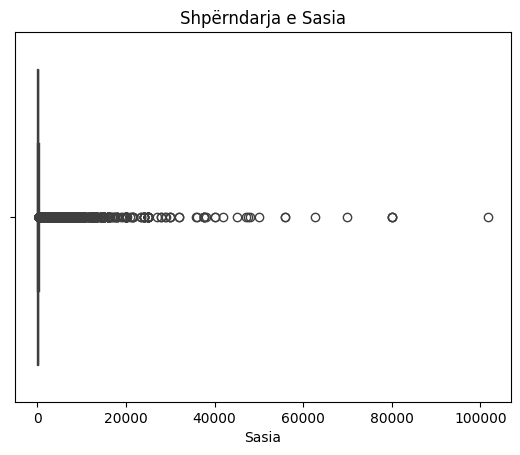

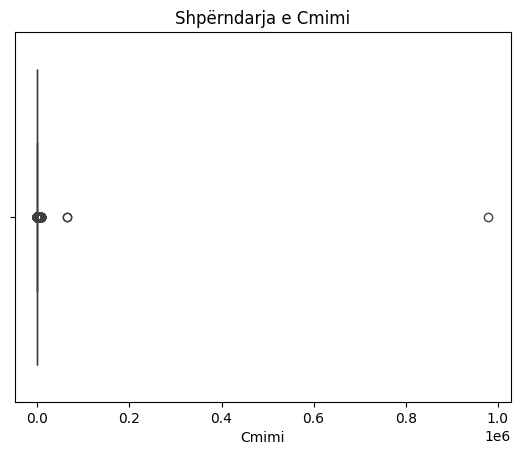

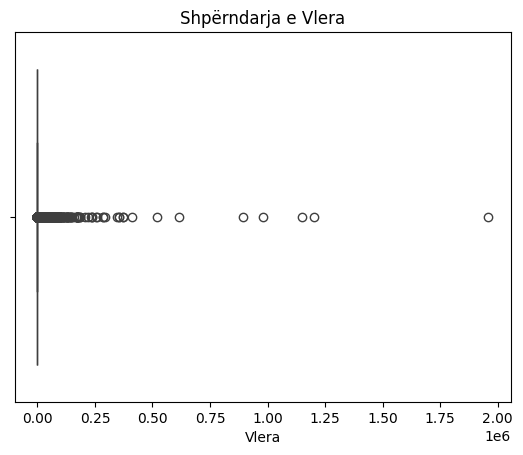

In [19]:
for col in numerike:
    plt.figure()
    sns.boxplot(x=dataset_kryesor[col])
    plt.title(f'Shpërndarja e {col}')
    plt.show()
